# Classifying Diabetes in Females
What health factors cause diabetes in females? Does pregnancy play a role? What about age and blood pressure? Wouldn't it be great to determine accurately what role certain health conditions play in determining some of the essential causes of diabetes? 

Recently, the National Institute of Diabetes and Digestive and Kidney Diseases published a dataset of women living in Arizona and their diagnostics of diabetes. Some of these women have the ill disease, and others do not. Furthermore, the institute welcomed data analysts/science enthusiasts to make sense of the data and help build a picture from the insight provided by the dataset. 

Therefore, the objective of the project is to predict and build an accurate ML model based on diagnostic measurements of whether a patient has diabetes. During this project, some of the questions I will answer are: 

    1 - What health conditions determine the possibility of diabetes? 
    2 - Does pregnancy increase the possibility of the disease?
    3 - Is there any combination of any health issues provided that lead to the diagnostics?
    4 - What insights can we draw from the dataset?

There are a few limitations we might face in the project. One of them is there is any other health condition not mentioned in the dataset that many of the women are experiencing? Medicine says each human body is distinct, so it is vital to know more information about women. Another factor that will affect the outcome of this project is the diet. I do not know what these women are consuming. Are they vegetarian? Does the food contain high levels of sodium? Is it fried food? 

Despite these hurdles, our job will be to determine the leading factors that cause diabetes from the knowledge given in the dataset, since other factors are out of our control. 

## Importing Necessary Libraries and Dataset(s)
As I work on this project, I will add the libraries I use to this section. So this part of the program will be constantly updated.

In [400]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import trim_mean
from scipy.stats import ttest_1samp
from statistics import variance

from sklearn.utils import resample

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [401]:
df = pd.read_csv('diabetes.csv')

## Basic Data Exploratory Analysis

It will be interesting to get some basic analysis before diving deeper into the investigation. Some of the questions to be answered are:

    1 - How many of the women who were pregnant, experienced diabetes? How many did not?
    2 - What is the average age group?
    3 - The average amount of kids women are having. 
    4 - What is the correlation between glucose levels, BMI, and insulin levels?
    5 - Are there any zero values and why are they there? (Should be treated as nan value?)
    6 - What is the outcome ratio?

In [402]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [403]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [404]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [405]:
df['BMI'] = df['BMI'].apply(np.int64)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].apply(np.int64)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [407]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


In [408]:
df.shape

(768, 9)

In [409]:
df = df.round(2)

In [410]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [411]:
np.sum(df.Pregnancies >= 1)

657

In [412]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

#### Women without children with diabetes 

In [413]:
pregnant_with_diabetes = df[(df['Pregnancies'] == 0) & (df['Outcome'] == 0)]
pregnant_with_diabetes.count()

Pregnancies                 73
Glucose                     73
BloodPressure               73
SkinThickness               73
Insulin                     73
BMI                         73
DiabetesPedigreeFunction    73
Age                         73
Outcome                     73
dtype: int64

In [414]:
not_pregnant_with_diabetes = df[(df['Pregnancies'] == 0) & (df['Outcome'] == 1)]
not_pregnant_with_diabetes.count()

Pregnancies                 38
Glucose                     38
BloodPressure               38
SkinThickness               38
Insulin                     38
BMI                         38
DiabetesPedigreeFunction    38
Age                         38
Outcome                     38
dtype: int64

38 out of 111 women who did not have childrean experienced diabetes. It will be interesting to see some dianostics data of these women. 

In [415]:
not_pregnant_with_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43,2,33,1
16,0,118,84,47,230,45,0,31,1
45,0,180,66,39,0,42,1,25,1
66,0,109,88,30,0,32,0,38,1
78,0,131,0,0,0,43,0,26,1
109,0,95,85,25,36,37,0,24,1
120,0,162,76,56,100,53,0,25,1
124,0,113,76,0,0,33,0,23,1
129,0,105,84,0,0,27,0,62,1
164,0,131,88,0,0,31,0,32,1


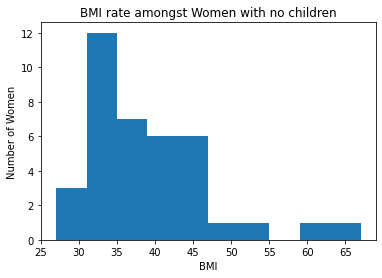

In [416]:
plt.hist(not_pregnant_with_diabetes['BMI']);
plt.xlabel("BMI")
plt.ylabel("Number of Women")
plt.title("BMI rate amongst Women with no children");

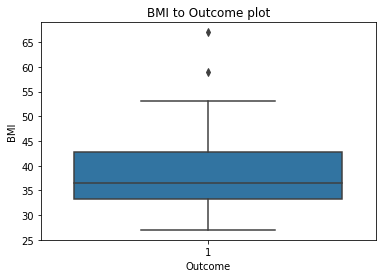

In [417]:
sns.boxplot(data=not_pregnant_with_diabetes, x='Outcome', y='BMI')
plt.title("BMI to Outcome plot");

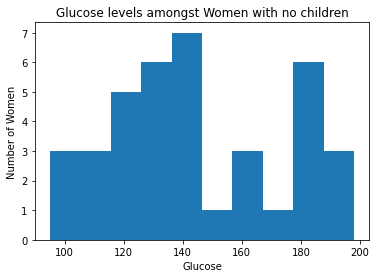

In [418]:
plt.hist(not_pregnant_with_diabetes['Glucose']);
plt.xlabel("Glucose")
plt.ylabel("Number of Women")
plt.title("Glucose levels amongst Women with no children");

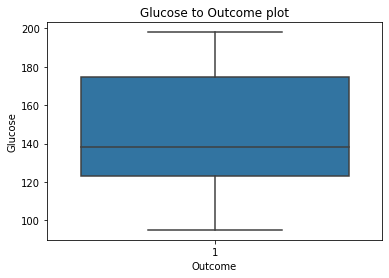

In [419]:
sns.boxplot(data=not_pregnant_with_diabetes, x='Outcome', y='Glucose')
plt.title("Glucose to Outcome plot");

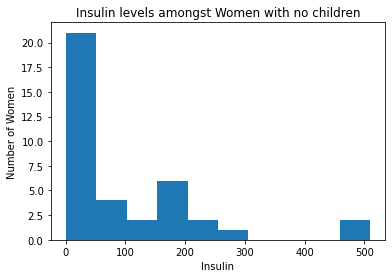

In [420]:
plt.hist(not_pregnant_with_diabetes['Insulin']);
plt.xlabel("Insulin")
plt.ylabel("Number of Women")
plt.title("Insulin levels amongst Women with no children");

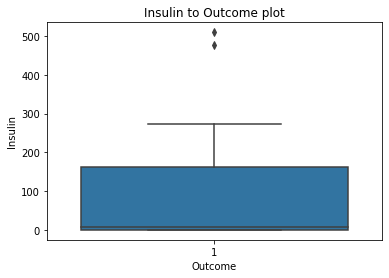

In [421]:
sns.boxplot(data=not_pregnant_with_diabetes, x='Outcome', y='Insulin')
plt.title("Insulin to Outcome plot");

In [422]:
not_pregnant_with_diabetes['Age'].median()

25.5

In [423]:
not_pregnant_with_diabetes['Age'].mean()

28.57894736842105

#### General Overall Analysis

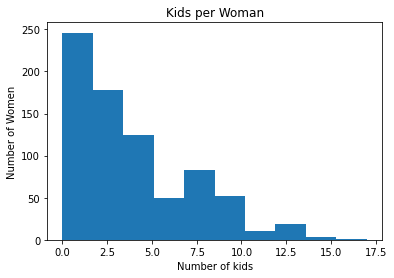

In [424]:
plt.hist(df['Pregnancies']);
plt.xlabel("Number of kids")
plt.ylabel("Number of Women")
plt.title("Kids per Woman");

The data seems to be skewed to the right. It will be important to normalize the data in the following sections.

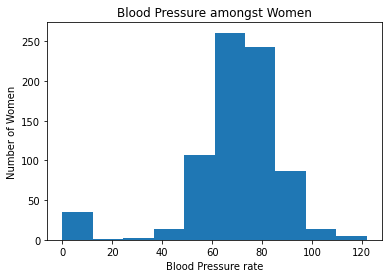

In [425]:
plt.hist(df['BloodPressure']);
plt.xlabel("Blood Pressure rate")
plt.ylabel("Number of Women")
plt.title("Blood Pressure amongst Women");

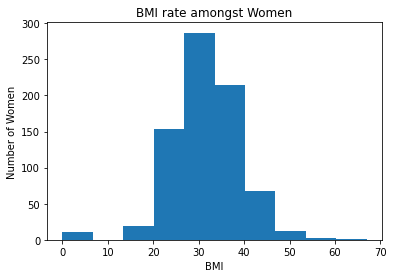

In [426]:
plt.hist(df['BMI']);
plt.xlabel("BMI")
plt.ylabel("Number of Women")
plt.title("BMI rate amongst Women");

In [427]:
#Function to check the average condition level weighted by the persons outcome of diabetes.
def averages(x):
    return np.average(x, weights=df['Outcome'])

averages(df['Age'])

37.06716417910448

In [428]:
trim_mean(df['Age'], 0.1)

31.54383116883117

In [429]:
df['Age'].median()

29.0

In [430]:
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(df, 'Pregnancies', 'Outcome')

4

The simple analysis shows the variability of the data collected. There is an ample amount of people with no diagnostics of diabetes. Out of the 768 women, 657 are pregnant with at least one child. The majority of the women have one child, while the most number of kids a woman had was 17. The average age in the data set is approximately 37 years old.

## Estimates of Variability


In [431]:
print(variance(df['Age']))
print(variance(df['Pregnancies']))

138.30304589037374
11.354056320621469


In [432]:
#Standard Deviation
from statistics import stdev

print(stdev(df['Age']))
print(stdev(df['Pregnancies']))

11.760231540678685
3.36957806269887


In [433]:
from numpy import mean, absolute

print(mean(absolute(df['Age'] - mean(df['Age']))))
print(mean(absolute(df['Pregnancies'] - mean(df['Pregnancies']))))

9.586405436197916
2.771620008680556


In [493]:
from numpy import median, absolute

def median_abso(x):
    return mean(absolute(x - median(x)))
age_absolute = median_abso(df['Age'])
print(age_absolute)

9.07421875


In [495]:
pregnancie_absolute = median_abso(df['Pregnancies'])
pregnancie_absolute

2.68359375

In [496]:
def quartile(x):
    q3, q1 = np.percentile(x, [75, 25])
    iqr = q3 - q1
    return iqr

print(quartile(df['Age']))
print(quartile(df['Pregnancies']))

17.0
5.0


In [497]:
print(quartile(df['Glucose']))
print(median_abso(df['Glucose']))

41.25
24.985677083333332


In [498]:
print(quartile(df['BMI']))
print(median_abso(df['BMI']))

9.0
5.82421875


## Further Exploratory Data Analysis

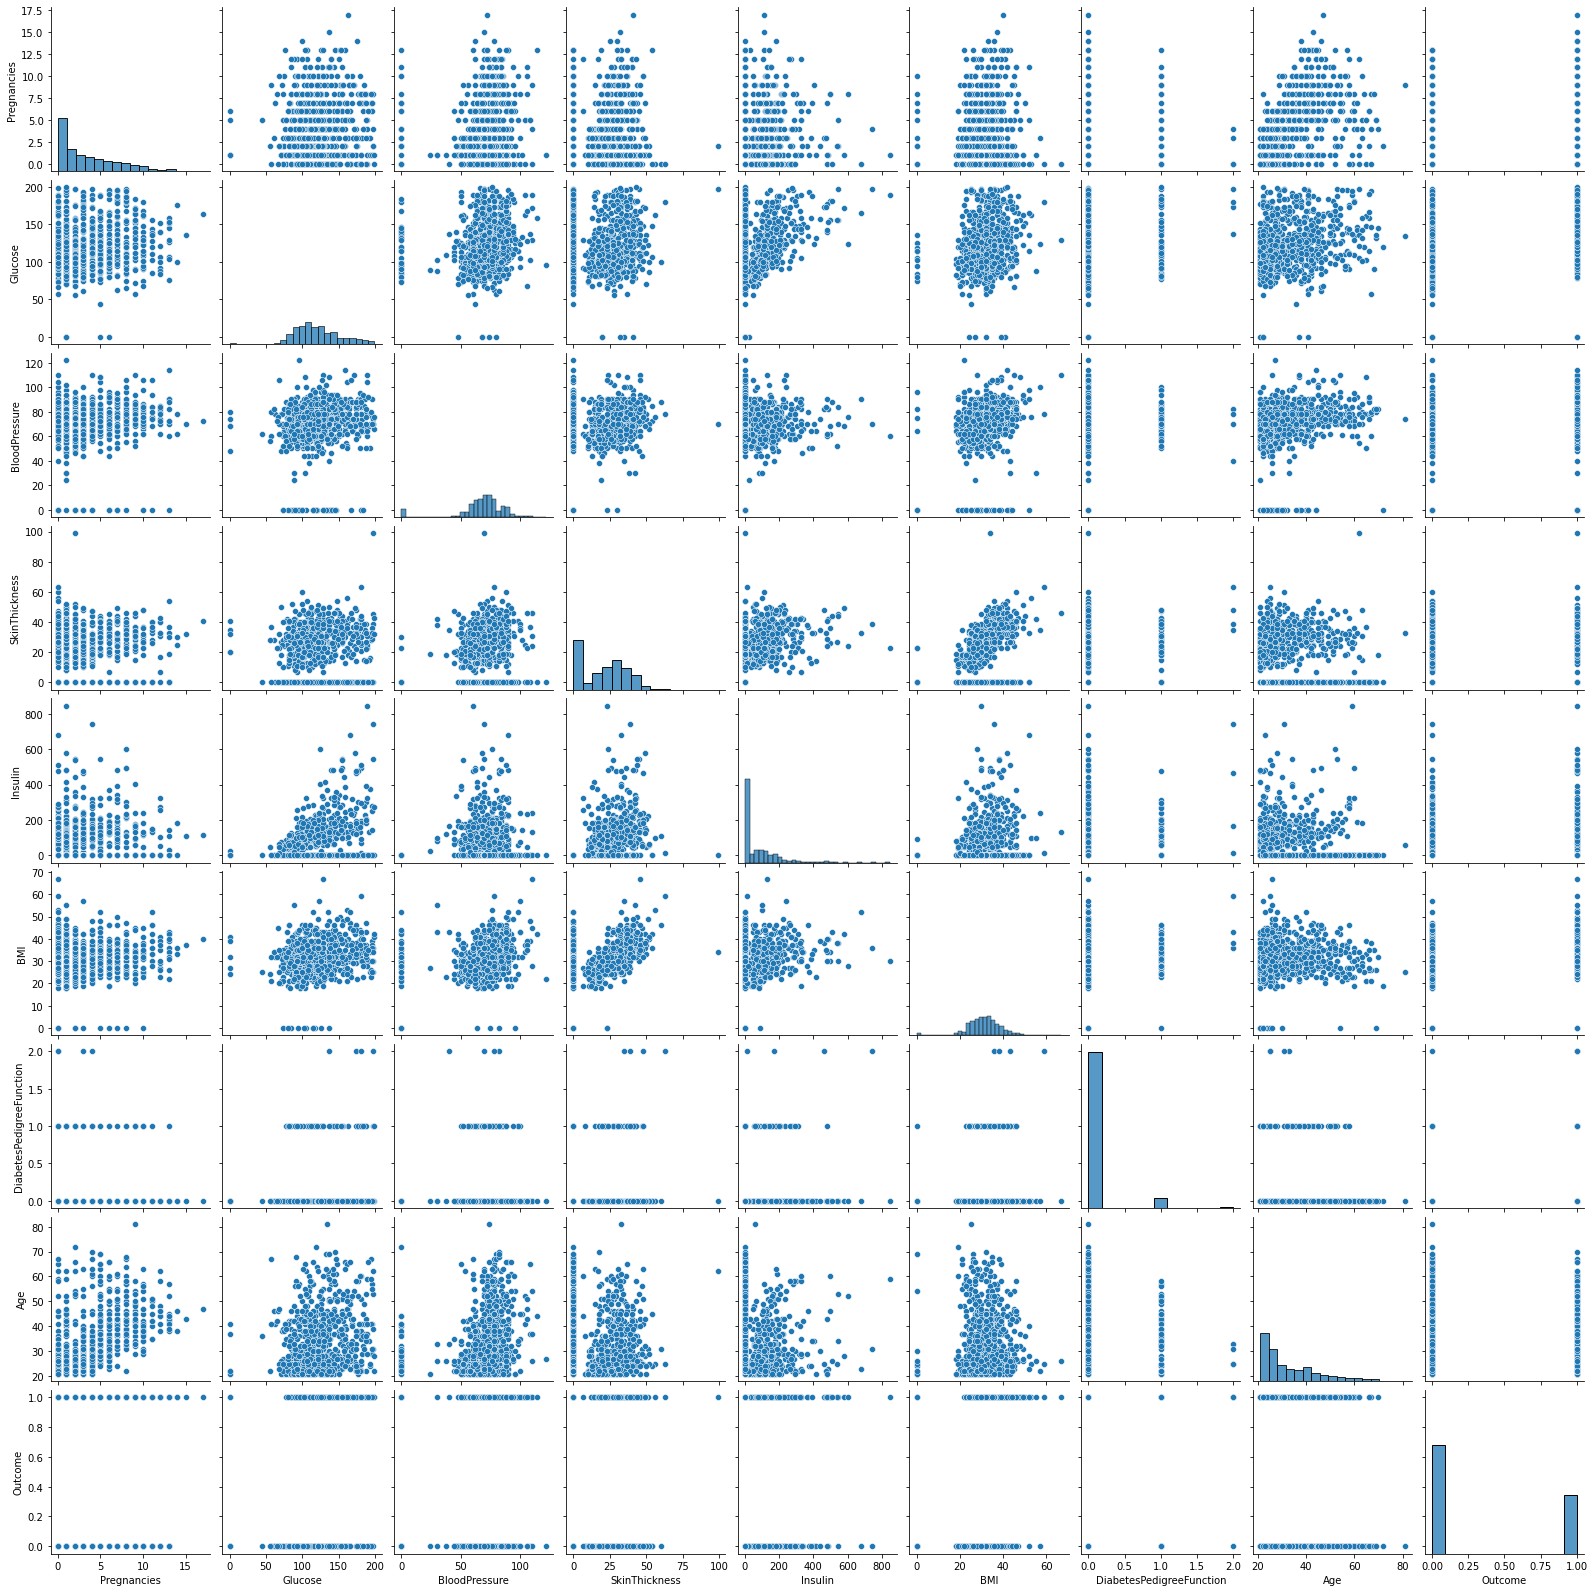

In [438]:
sns.pairplot(df)
plt.show()

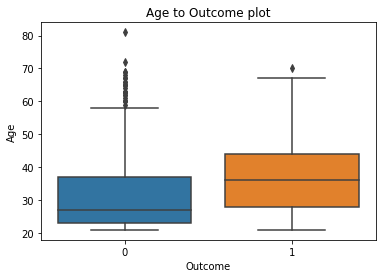

In [439]:
sns.boxplot(data=df, x='Outcome', y='Age')
plt.title("Age to Outcome plot");

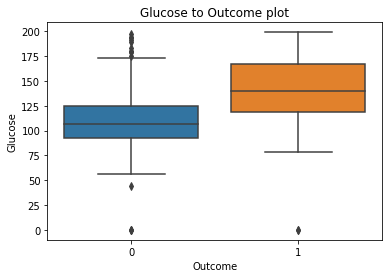

In [440]:
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title("Glucose to Outcome plot");

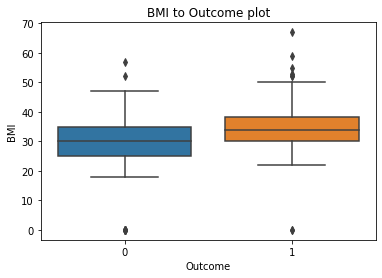

In [441]:
sns.boxplot(data=df, x='Outcome', y='BMI')
plt.title("BMI to Outcome plot");

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

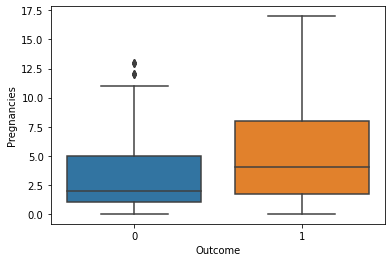

In [442]:
sns.boxplot(y='Pregnancies',x='Outcome',data=df)

In [443]:
frequency_table = df.copy()
frequency_table['freq'] = pd.cut(df['Age'], 10)
frequency_table.groupby('freq')['Outcome'].count().reset_index()

,freq,Outcome
0,"(20.94, 27.0]",332
1,"(27.0, 33.0]",142
2,"(33.0, 39.0]",87
3,"(39.0, 45.0]",89
4,"(45.0, 51.0]",45
5,"(51.0, 57.0]",31
6,"(57.0, 63.0]",25
7,"(63.0, 69.0]",14
8,"(69.0, 75.0]",2
9,"(75.0, 81.0]",1


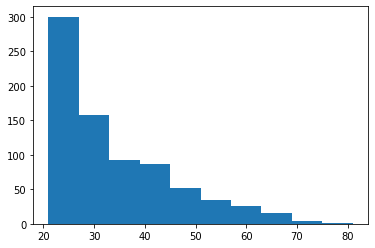

In [444]:
plt.hist(df['Age']);

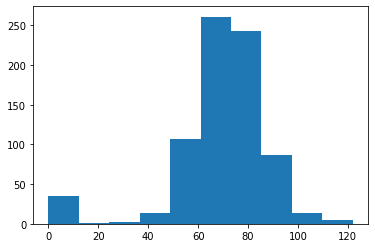

In [499]:
plt.hist(df['BloodPressure']);

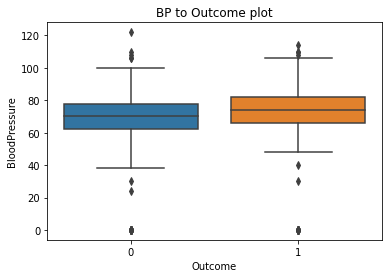

In [501]:
sns.boxplot(data=df, x='Outcome', y='BloodPressure')
plt.title("BP to Outcome plot");

No strong correlation between outcome and blood-pressure and do not see a reason to include this in our classification models. 

In [500]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.016501,-0.014610,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.218293,0.133843,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.279822,0.066559,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.393608,0.122670,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197368,0.119496,-0.042163,0.130548
BMI,0.016501,0.218293,0.279822,0.393608,0.197368,1.000000,0.109890,0.034266,0.292494
DiabetesPedigreeFunction,-0.014610,0.133843,0.066559,0.122670,0.119496,0.109890,1.000000,0.032661,0.126164
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.034266,0.032661,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292494,0.126164,0.238356,1.000000


<AxesSubplot:>

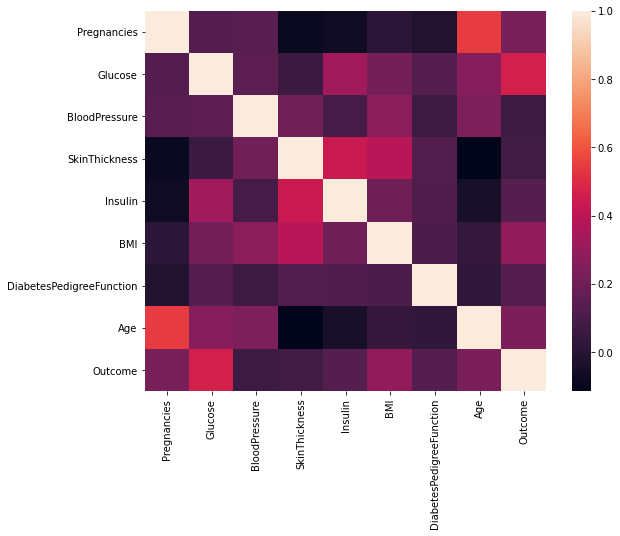

In [446]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr())

There seems to be a high correlation between Age, Glucose, Insulin, and BMI in regards to a diabetes diagnostics. Lets do some hypothesis test before implementing our ML models for predictions. 

## Sampling The Data

Text(0.5, 1.0, 'Central Limit Theorem')

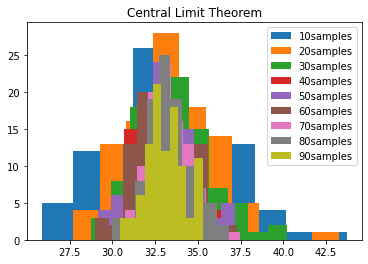

In [447]:
sample_amounts = range(10, 100, 10)

for x in sample_amounts:
    samples = []
    for i in range(100):
        samples.append(df['Age'].sample(x).mean())
    plt.hist(samples) 
plt.legend([str(z) + "samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

In [448]:
#Standard Error
df['Age'].sem()

0.4243608028589479

## Bootstrap, Statistics, and A/B testing

In [449]:
results = []
for nrepeat in range(1000):
    sample = resample(df['Age'])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df["Age"].median()}')
print(f'bias: {results.mean() - df["Age"].median()}')
print(f'std. error: {results.std()}')


Bootstrap Statistics:
original: 29.0
bias: 4.233249999999998
std. error: 0.4315361679409396


In [450]:
sample.median()

29.0

In [451]:
sample_size = len(df)
print(sample_size)
#calculate and print num_purchased:

y = np.sum(df['Outcome'] == 1)
print(y)

768
268


In [504]:
one_visitor = np.random.choice([1, 0], size=1, p=[0.28, 0.72])
print(one_visitor)


[0]


In [503]:
null_outcomes = []

for i in range(10000):
    m_visitors = np.random.choice([1, 0], size=768, p=[0.30, 0.70])
    h = np.sum(m_visitors == 1)
    null_outcomes.append(h)
    
null_min = np.min(null_outcomes)
print(null_min)
null_max = np.max(null_outcomes)
print(null_max)


188
282


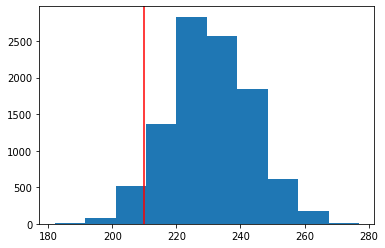

In [454]:
plt.hist(null_outcomes)
plt.axvline(210, color = 'r')

plt.show()

In [455]:
null_90CI = np.percentile(null_outcomes, [2.5, 97.5])
print(null_90CI)

[206. 256.]


In [456]:
null_outcomes1 = np.array(null_outcomes)
p_value = np.sum(null_outcomes1 <= 210)/len(null_outcomes1)
print(p_value)

0.0593


In [457]:
null_outcomes2 = np.array(null_outcomes)
p_value = np.sum((null_outcomes2 <= 210) | (null_outcomes2 >= 259))/len(null_outcomes2)
print(p_value)

0.0752


In [458]:
def simulation_binomial_test(observed_successes, n, p):
      #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice([1, 0], size=n, p=[p, 1-p])
    num_purchased = np.sum(simulated_monthly_visitors == 1)
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  
  #return the p-value
  return p_value

In [459]:
p_value1 = simulation_binomial_test(210, 768, .3)
print("simulation p-value: ", p_value1)

simulation p-value:  0.0544


In [460]:
from scipy.stats import binom_test

p_value_2sided = binom_test(210, 768, .3)
print(p_value_2sided)
p_value_1sided = binom_test(210, 768, .3, alternative = 'less')
print(p_value_1sided)

0.1152101253923893
0.057615815306307896


In [461]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Glucose ~ Pregnancies', data = df)

results = model.fit()
print(results.params)

Intercept      116.171334
Pregnancies      1.228383
dtype: float64


In [462]:
newdata = {"Pregnancies":[6]}
pred = results.predict(newdata)
print(pred)


0    123.541633
dtype: float64


In [463]:
fitted_values = results.predict(df)
# Calculate `residuals` here:
residuals = df.Age - fitted_values
# Print the first 5 residuals here:
print(residuals.head(5))


0   -73.541633
1   -86.399717
2   -93.998399
3   -96.399717
4   -83.171334
dtype: float64


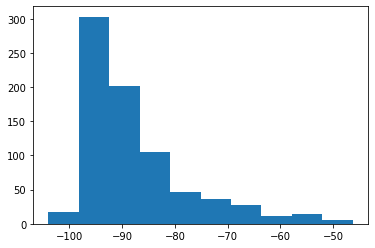

<Figure size 432x288 with 0 Axes>

In [464]:
plt.hist(residuals)

plt.show()
plt.clf()

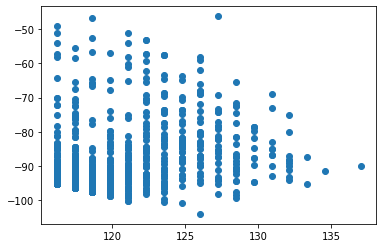

In [465]:
plt.scatter(fitted_values, residuals)
plt.show()

## Feature Selection

In [466]:
selector = VarianceThreshold(threshold=0)
print(selector.fit_transform(df))
print(selector.get_support(indices=True))
num_cols = list(df.columns[selector.get_support(indices=True)])
 
print(num_cols)

[[  6 148  72 ...   0  50   1]
 [  1  85  66 ...   0  31   0]
 [  8 183  64 ...   0  32   1]
 ...
 [  5 121  72 ...   0  30   0]
 [  1 126  60 ...   0  47   1]
 [  1  93  70 ...   0  23   0]]
[0 1 2 3 4 5 6 7 8]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


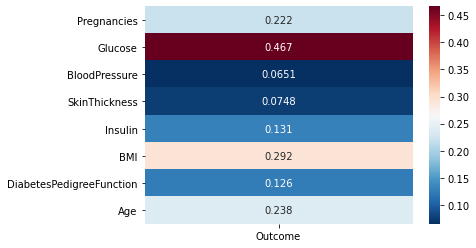

In [467]:
corr_matrix = df.corr()
 
# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['Outcome']].drop(labels=['Outcome'])
 
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [505]:
features = df[['BMI', "Glucose", "Insulin", "Pregnancies", "Age"]]
outcome = df[['Outcome']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.2)

In [506]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

## Machine Learning Models
We are going to classify some diagnostics leading up to diabetes. According to our feature selection and hypothesis testing, the two best models we can use are Support Vector Machine and Decision trees. Since our data is nonlinear, SVM can capture the complex relationships of the different diagnostics associated with diabetes. Our EDA suggests the range of diabetes diagnostics can fall into many classes, therefore, SVM will be able to best classify those groups. 

Another model to focus on is the Decision Tree due to its robustness. Furthermore, its interpretability will be simple and since the data is not that large, it is quite ideal in our scenario. 

Along with these classification models, it will be important to compare them with other models to see their performance and accuracy. We want high-performance rates based on the level of data provided. 

### K-Nearest-Neighbor

In [470]:
KN = KNeighborsClassifier()

In [471]:
KN.fit(features_train, outcome_train.values.ravel())

KNeighborsClassifier()

In [472]:
score = KN.score(features_test, outcome_test)
score

0.7300813008130081

In [473]:
prediction = KN.predict(features_test)

In [474]:
probabilities = KN.predict_proba(features_test)
probabilities

array([[0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       ...,
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6]])

### Support Vector Machine

In [475]:
svc = SVC(kernel='rbf')

In [476]:
svc.fit(features_train, outcome_train.values.ravel())

SVC()

In [477]:
print(svc.score(features_test, outcome_test))

0.751219512195122


### Decision Tree Classifier

In [478]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [479]:
DT.fit(features_train, outcome_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [480]:
print(DT.score(features_test, outcome_test))

0.7284552845528456


In [481]:
print(DT.tree_.max_depth)

4


### Random Forest Classifier

In [482]:
RF = RandomForestClassifier(n_estimators = 2000, random_state = 0)

In [483]:
RF.fit(features_train, outcome_train.values.ravel())

RandomForestClassifier(n_estimators=2000, random_state=0)

In [484]:
print(RF.score(features_test, outcome_test))

0.7463414634146341


### Logistic Regression

In [485]:
# Create and train the model
model = LogisticRegression()

In [486]:
model.fit(features_train, outcome_train.values.ravel())

LogisticRegression()

In [487]:
print(model.score(features_test, outcome_test))

0.7626016260162601


In [488]:
print(model.coef_)

[[ 0.63216715 -0.56418305  1.05355771 -0.03971575  0.5137035   0.20879469]]


# Conclusions

#### Overview 
The data suggest that pregnancies rates increase other diagnostic levels that lead to diabetes. Women who had more children experienced more health issues that led to increased glucose levels and lower insulin rates. Another interesting insight from the data is women with a higher level of blood pressure, despite all other diagnostics, experienced diabetes. There seems to be a strong correlation between the level of blood pressure and the possibility of diabetes. 

#### Some Statistics
Predominately, the majority of the women in the data are aged between 22 - 28. The average amount of kids these women are having is around two kids. There is also a sizeable majority of women who do not have any kids but still experience diabetes. However, there causes in more directly related to high glucose levels and low levels of insulin. Therefore, it is a health issue coming from other problems that are not suggested by the dataset. 

Insulin, glucose, blood pressure, and BMI are some of the bigger reasons some women experience diabetes. The data explicitly shows that pregnancies cause changes in women's health levels that cause the rate of diabetes to increase.  

#### Models Chosen
The ideal models for the project are SVM and Decision trees due to their reliability and high accuracy rates. Since this is not a huge dataset, both of these models can work with highly effective rates.

Both of the models are ideal due to their interpretability. After validating the models, the positive return rate was high for usability. Therefore, if you want to diagnose diabetes on certain health traits, these models will be efficient in achieving that cause. 
